# rocketman lab

In [6]:
import sys
sys.path.insert(0, 'C:\\Data\\Dev\\PyCharmProjects\\rocketman\\src')

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import pandas as pd

from PIL import Image, ImageFile
import cv2
from peakdetect import peakdetect
import imagehash
from imagecluster import calc, io as icio, postproc

import sklearn as sk
from sklearn import cluster as cluster_models
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

## image clustering with neuronal nets
https://github.com/elcorto/imagecluster

In [ ]:
similarity = 0.65
fpath_notes = "C:\\Data\\Dev-Data\\music\\notes\\"

# Create image database in memory. This helps to feed images to the NN model
# quickly.
ias = icio.read_images(fpath_notes, size=(224, 224))

# Create Keras NN model.
model = calc.get_model()

# Feed images through the model and extract fingerprints (feature vectors).
fps = calc.fingerprints(ias, model)

# Optionally run a PCA on the fingerprints to compress the dimensions. Use a
# cumulative explained variance ratio of 0.95.
#fps = calc.pca(fps, n_components=0.95)

# Run clustering on the fingerprints.  Select clusters with similarity index
clusters = calc.cluster(fps, sim=similarity)

C:\Data\Dev-Data\music\notes\01_0_0.PNG
C:\Data\Dev-Data\music\notes\01_0_0_0.png
C:\Data\Dev-Data\music\notes\01_0_0_1.png
C:\Data\Dev-Data\music\notes\01_0_0_10.png
C:\Data\Dev-Data\music\notes\01_0_0_11.png
C:\Data\Dev-Data\music\notes\01_0_0_12.png
C:\Data\Dev-Data\music\notes\01_0_0_13.png
C:\Data\Dev-Data\music\notes\01_0_0_14.png
C:\Data\Dev-Data\music\notes\01_0_0_15.png
C:\Data\Dev-Data\music\notes\01_0_0_16.png
C:\Data\Dev-Data\music\notes\01_0_0_17.png
C:\Data\Dev-Data\music\notes\01_0_0_18.png
C:\Data\Dev-Data\music\notes\01_0_0_19.png
C:\Data\Dev-Data\music\notes\01_0_0_2.png
C:\Data\Dev-Data\music\notes\01_0_0_20.png
C:\Data\Dev-Data\music\notes\01_0_0_21.png
C:\Data\Dev-Data\music\notes\01_0_0_22.png
C:\Data\Dev-Data\music\notes\01_0_0_23.png
C:\Data\Dev-Data\music\notes\01_0_0_24.png
C:\Data\Dev-Data\music\notes\01_0_0_25.png
C:\Data\Dev-Data\music\notes\01_0_0_26.png
C:\Data\Dev-Data\music\notes\01_0_0_27.png
C:\Data\Dev-Data\music\notes\01_0_0_3.png
C:\Data\Dev-Data\m

Cluster:  0


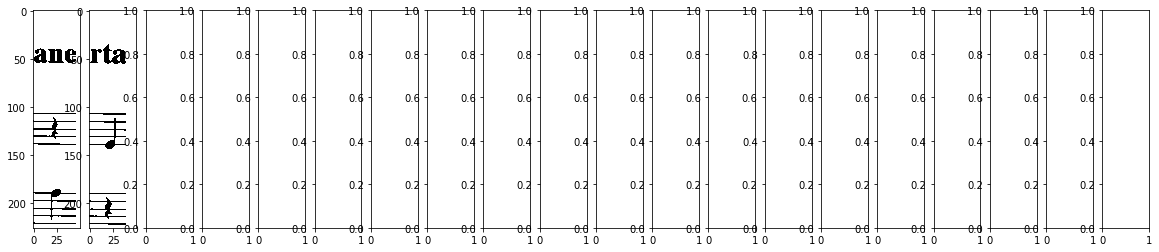

Cluster:  1


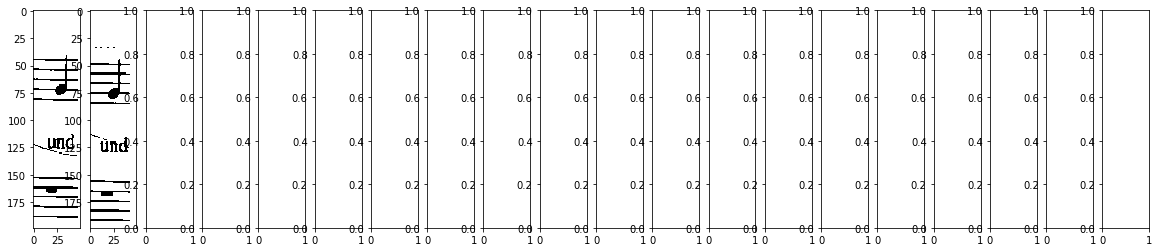

Cluster:  2


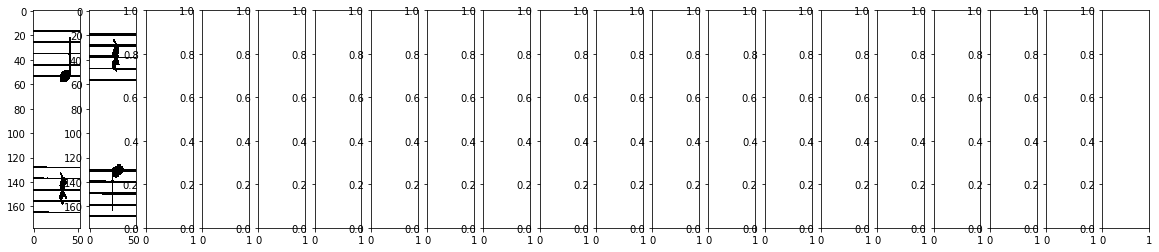

Cluster:  3


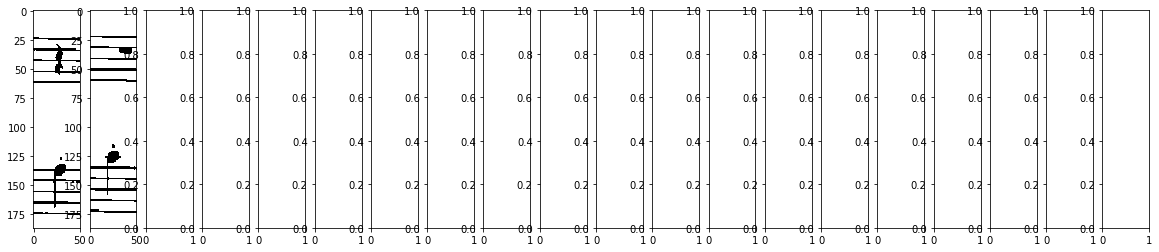

Cluster:  4


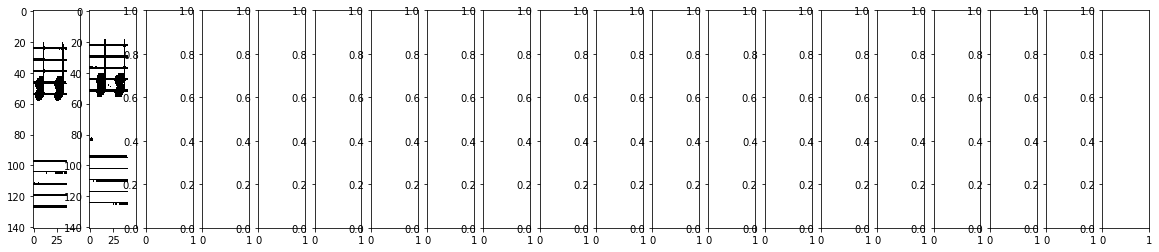

Cluster:  5


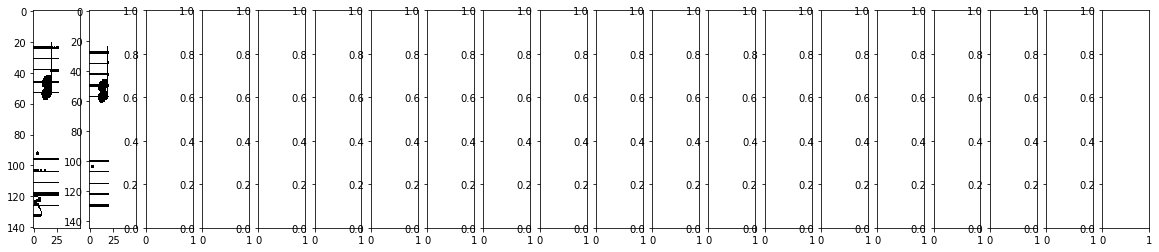

Cluster:  6


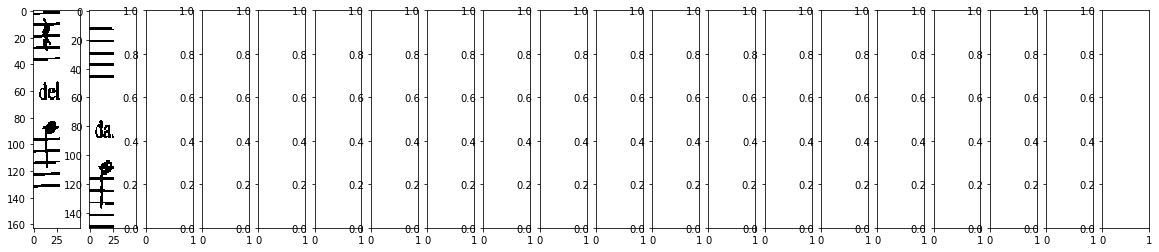

Cluster:  7


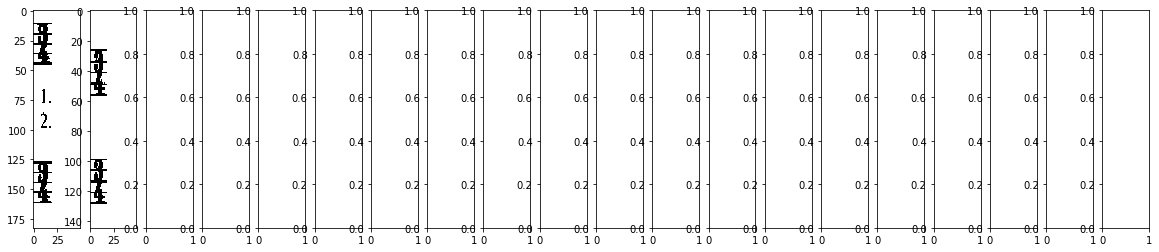

Cluster:  8


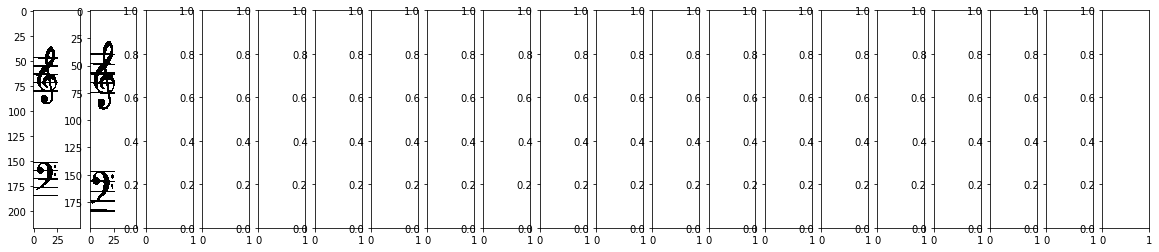

Cluster:  9


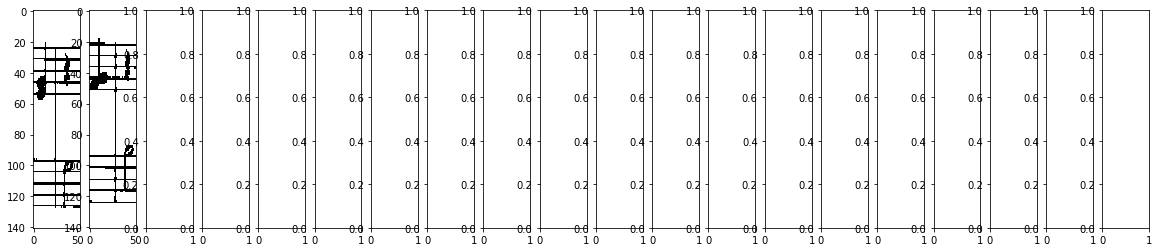

Cluster:  10


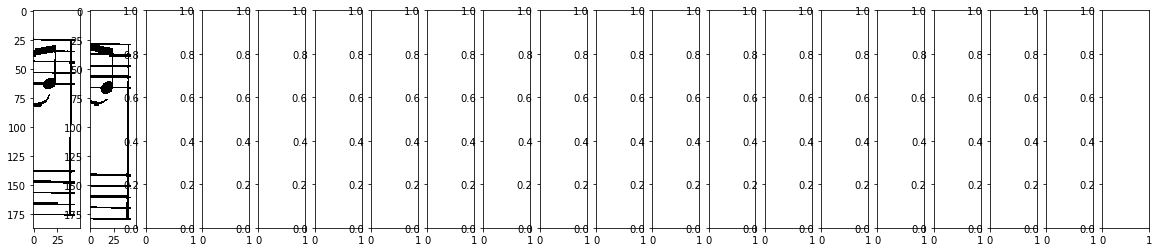

Cluster:  11


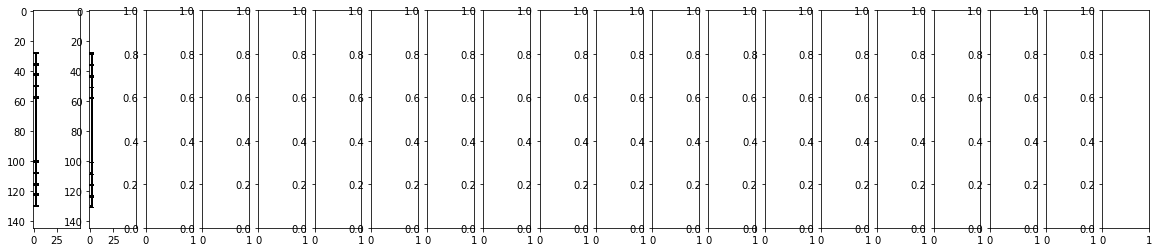

Cluster:  12


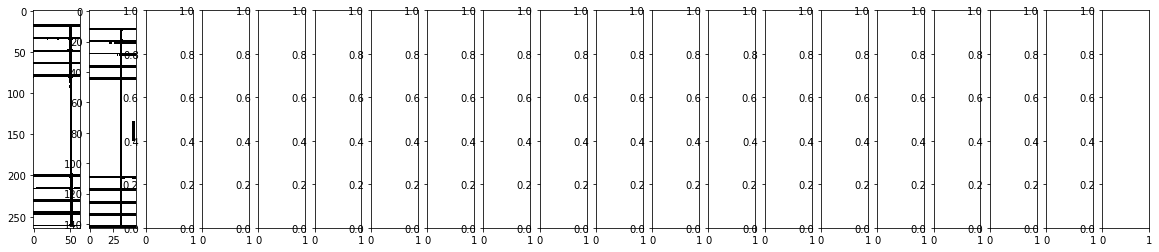

Cluster:  13


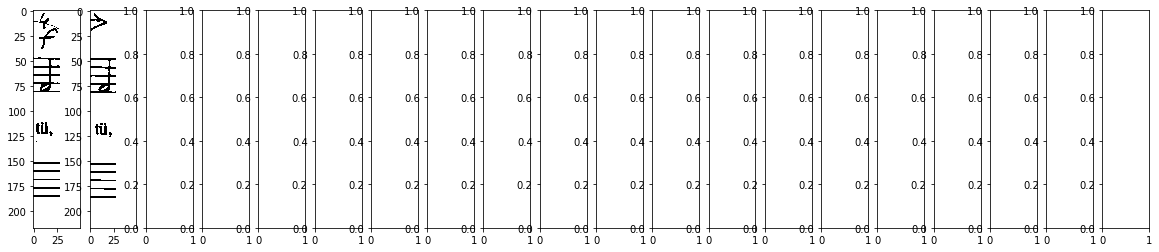

Cluster:  14


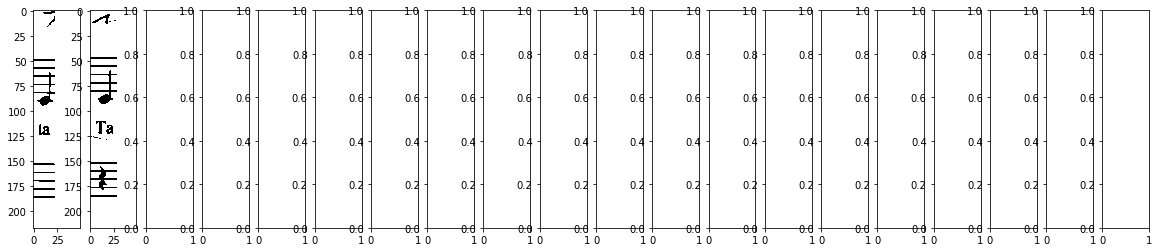

Cluster:  15


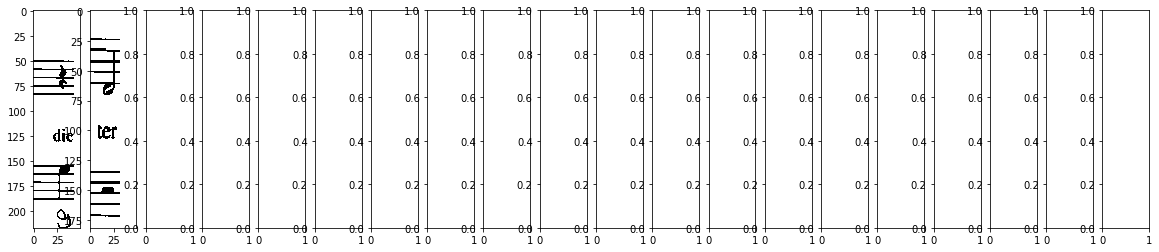

Cluster:  16


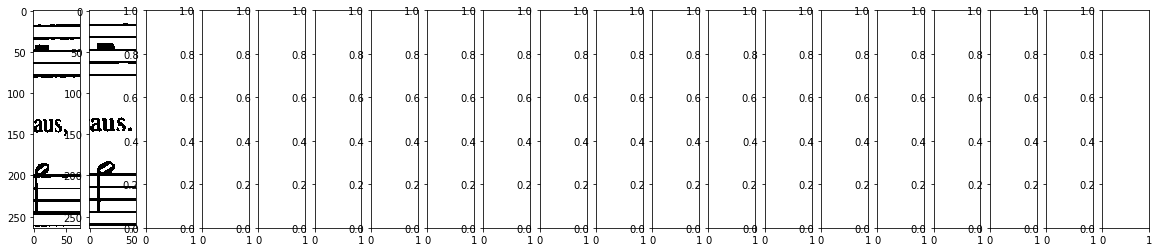

Cluster:  17


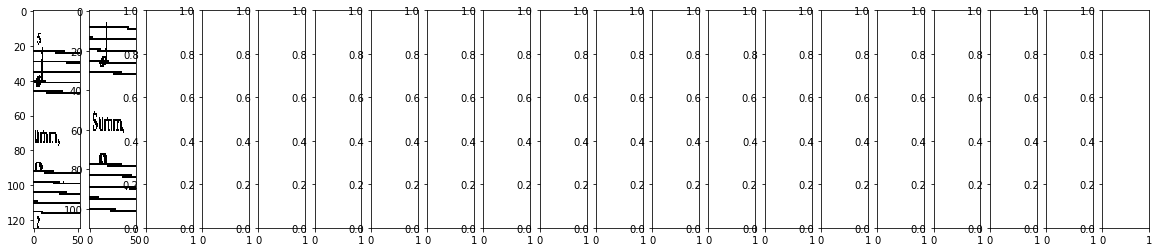

Cluster:  18


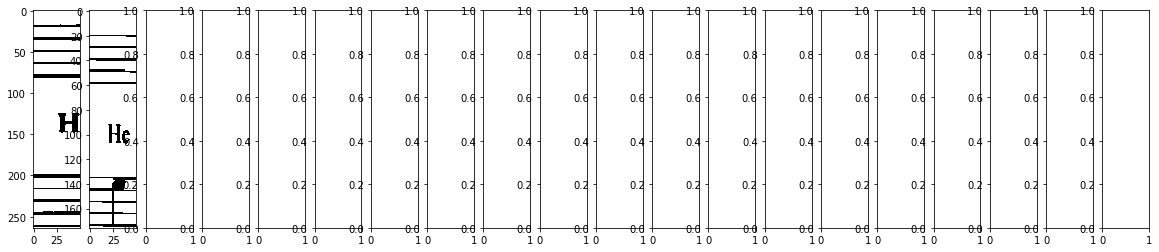

Cluster:  19


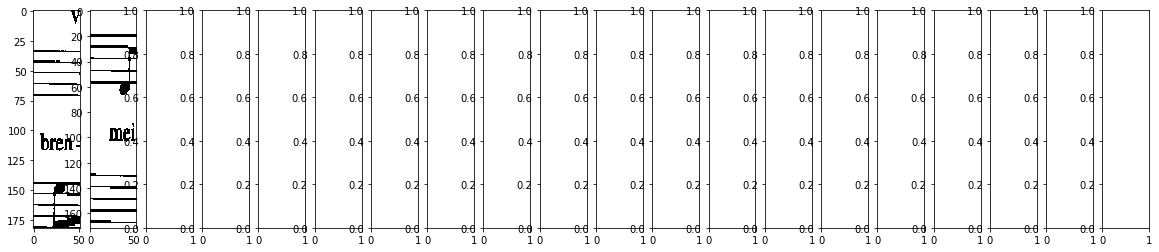

Cluster:  20


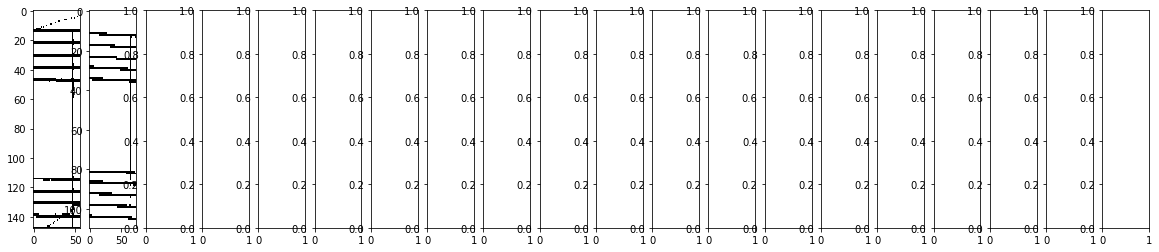

Cluster:  21


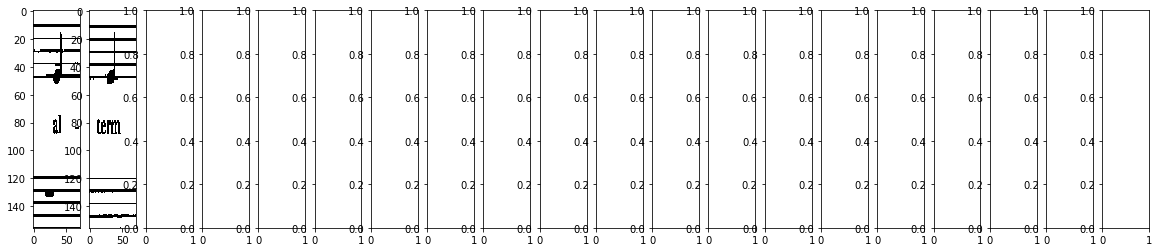

Cluster:  22


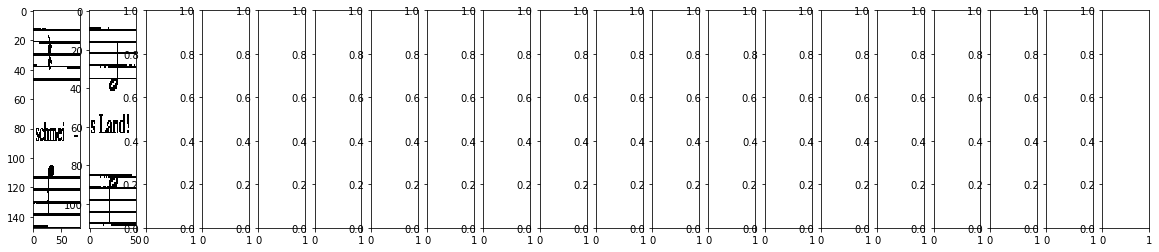

Cluster:  23


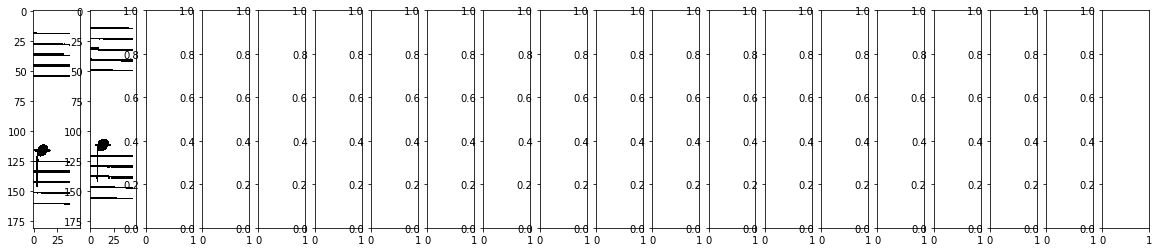

Cluster:  24


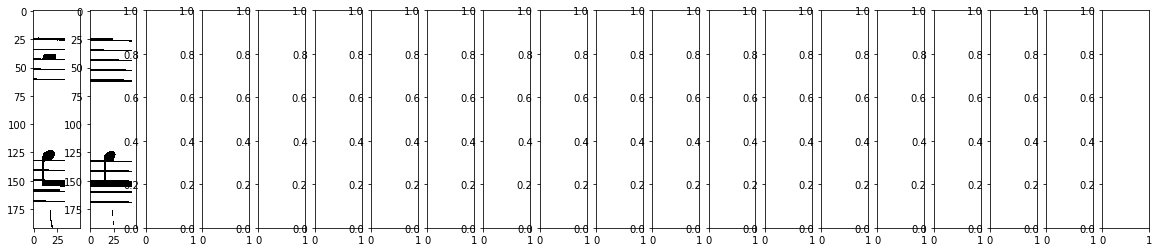

Cluster:  25


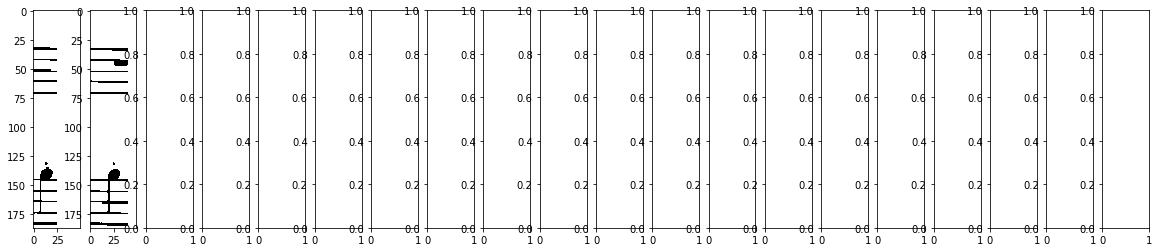

Cluster:  26


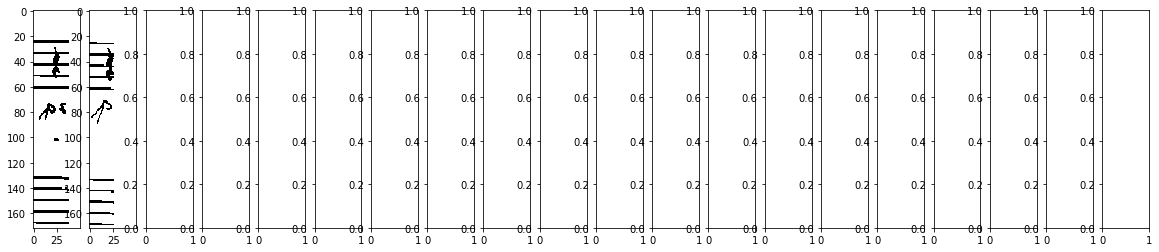

Cluster:  27


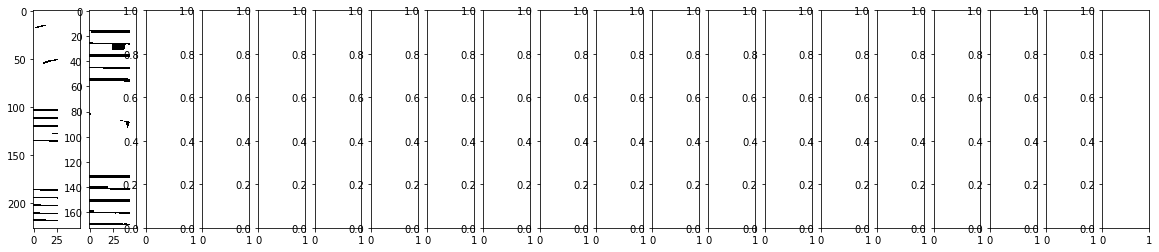

Cluster:  28


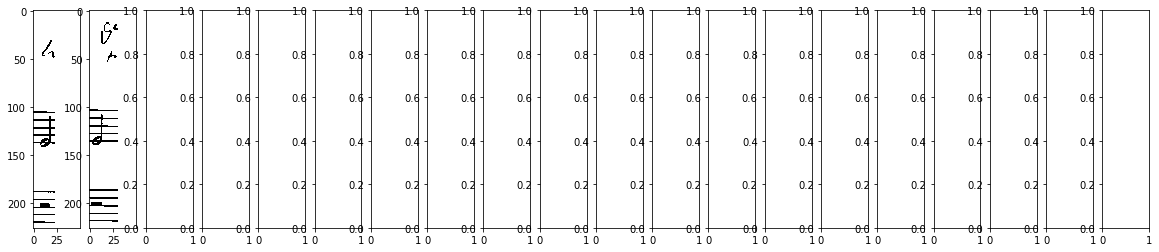

Cluster:  29


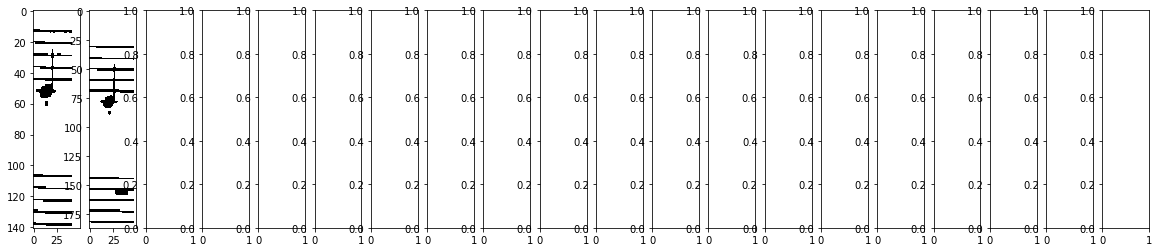

Cluster:  30


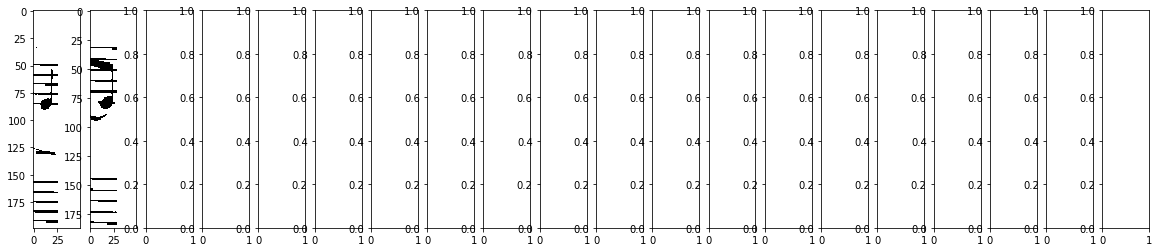

Cluster:  31


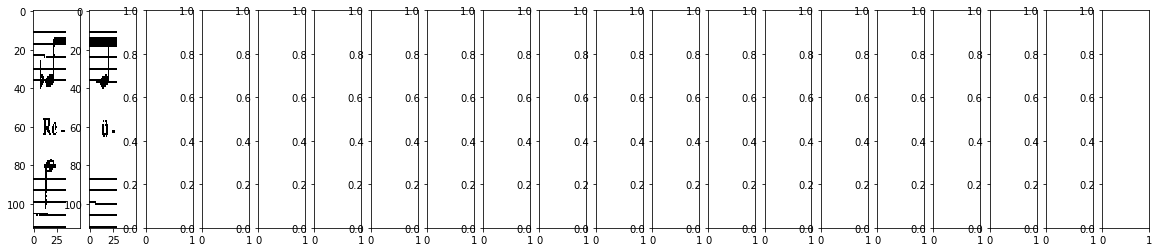

Cluster:  32


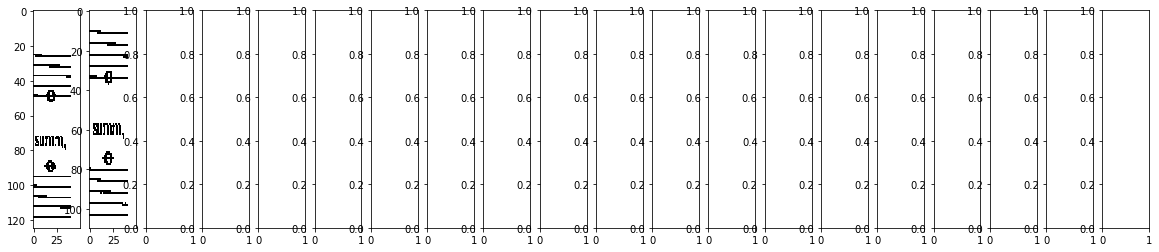

Cluster:  33


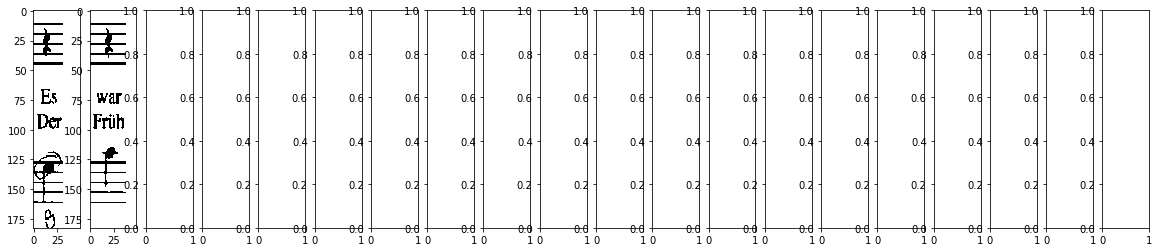

Cluster:  34


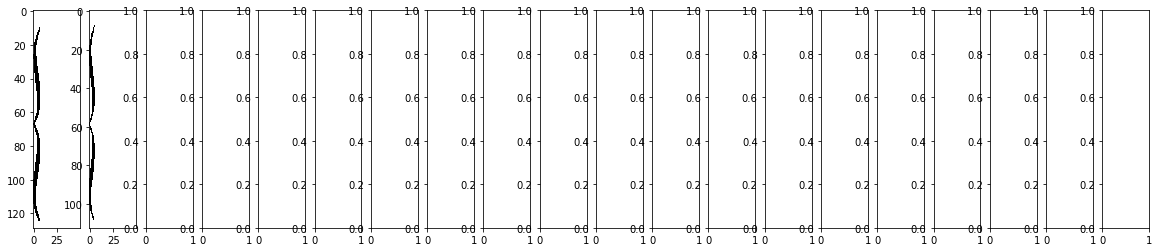

Cluster:  35


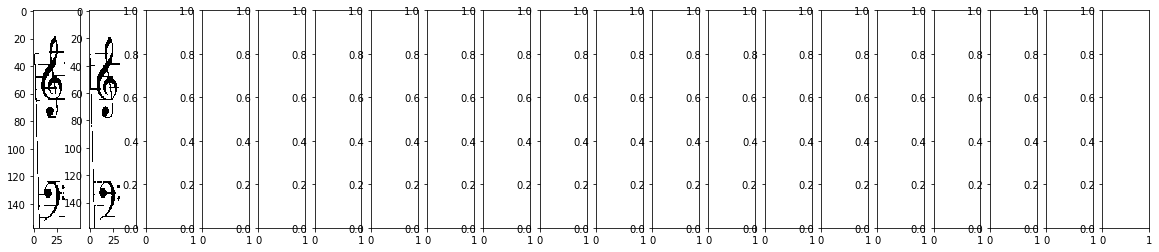

Cluster:  36


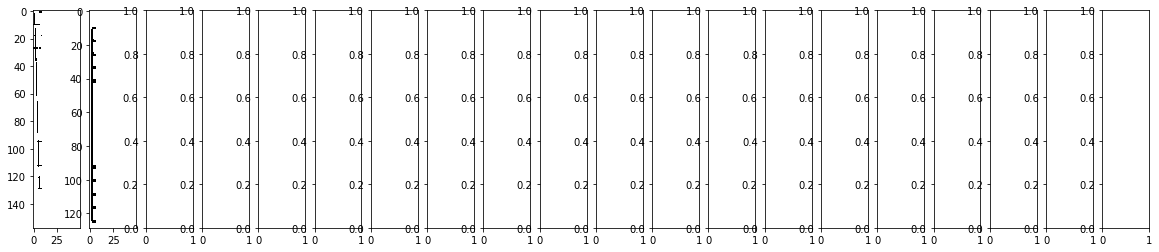

Cluster:  37


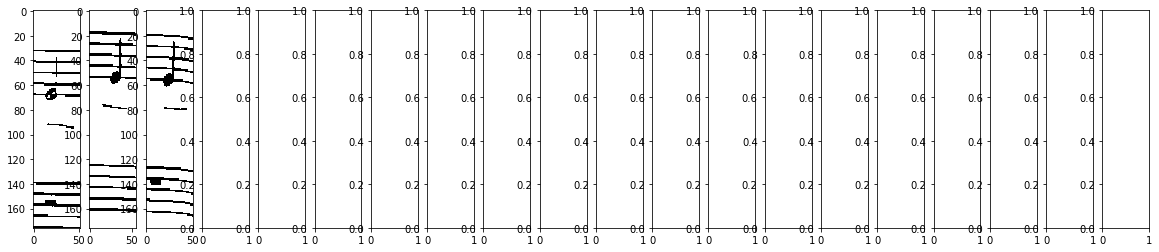

Cluster:  38


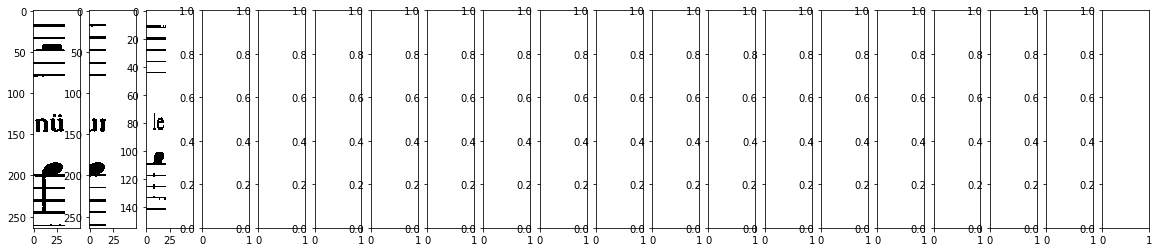

Cluster:  39


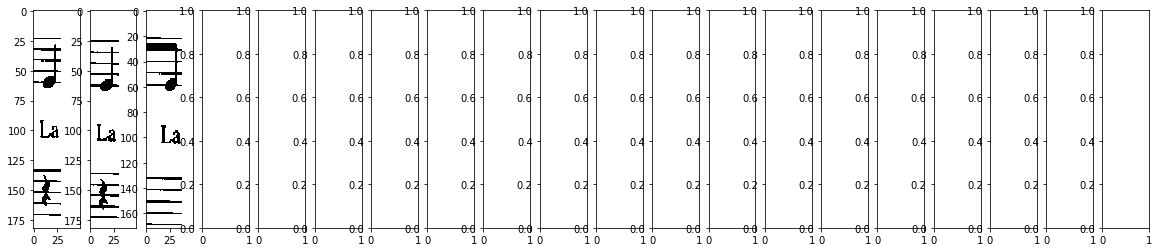

Cluster:  40


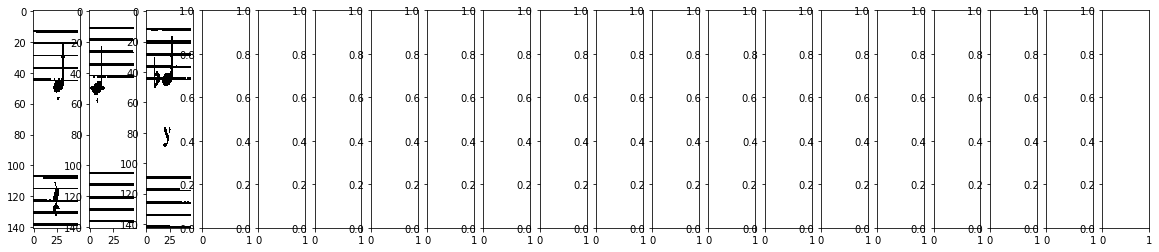

Cluster:  41


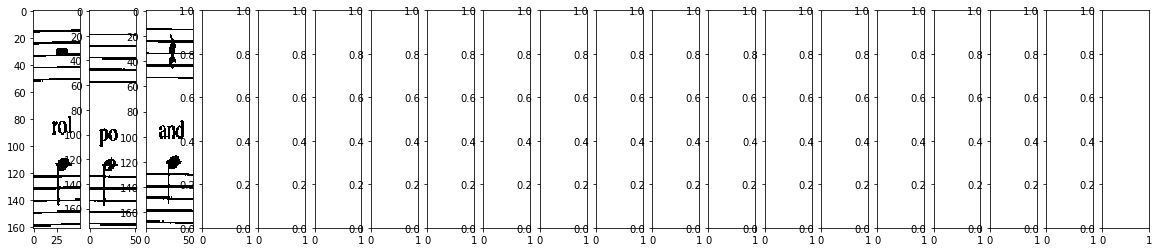

Cluster:  42


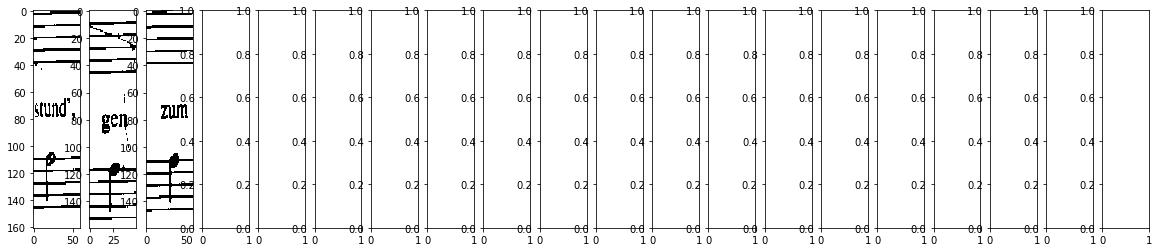

Cluster:  43


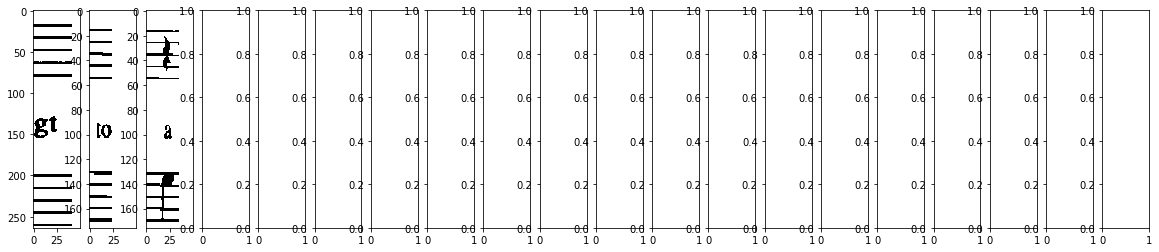

Cluster:  44


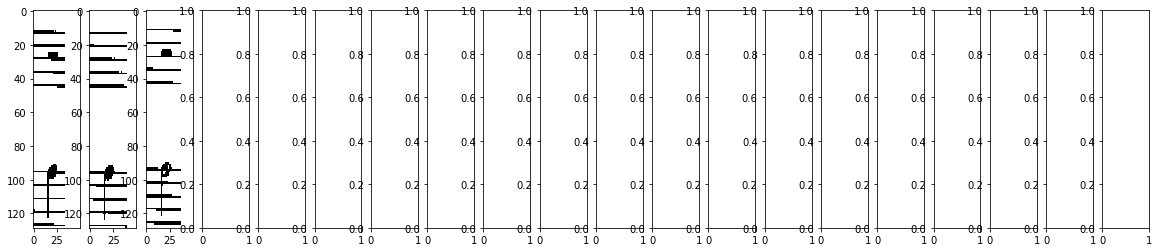

Cluster:  45


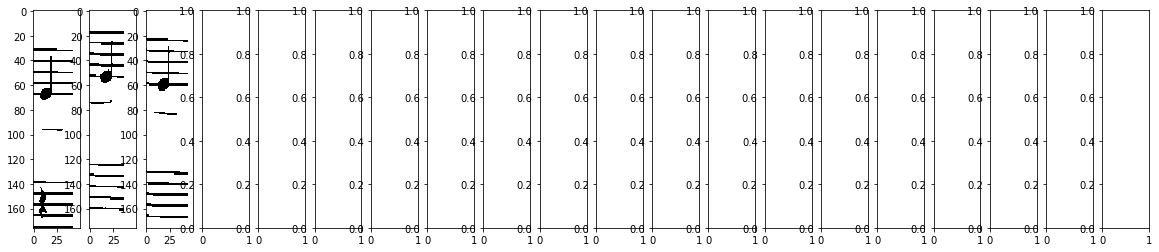

Cluster:  46


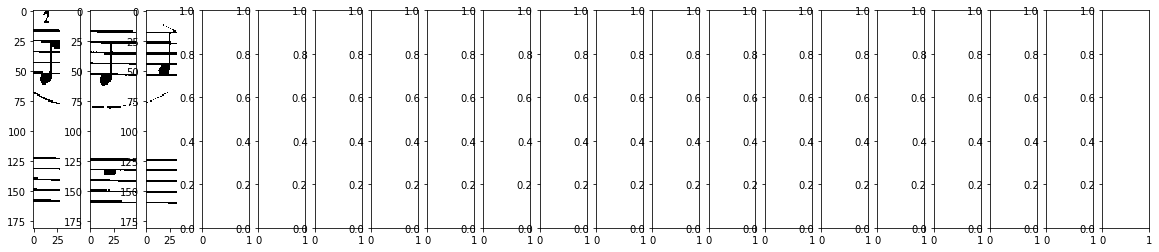

Cluster:  47


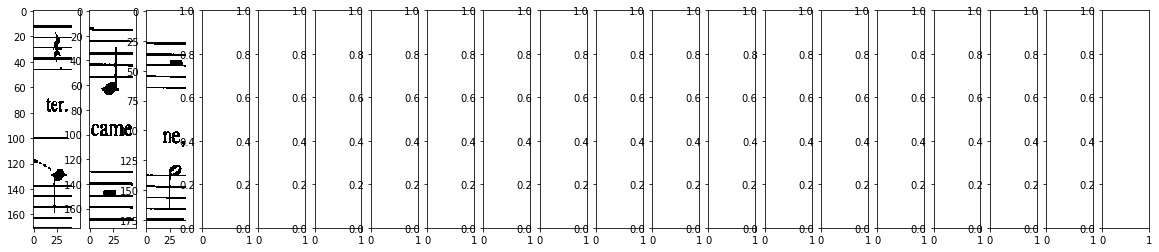

Cluster:  48


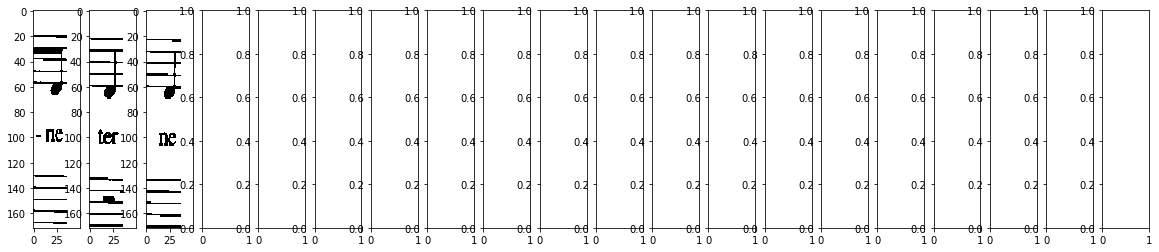

Cluster:  49


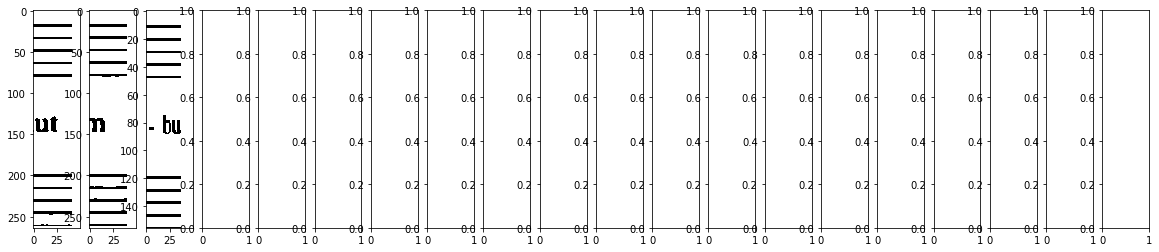

Cluster:  50


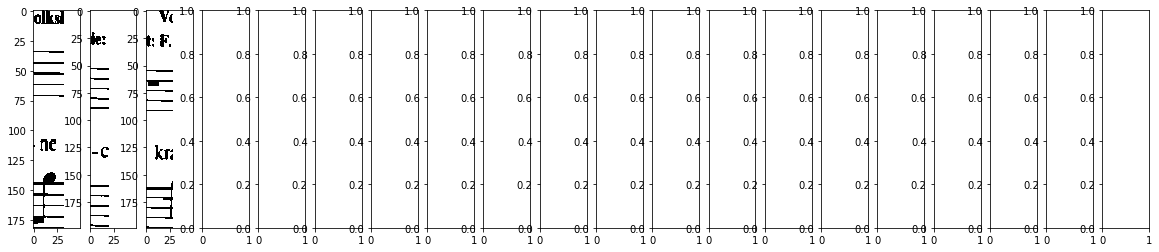

Cluster:  51


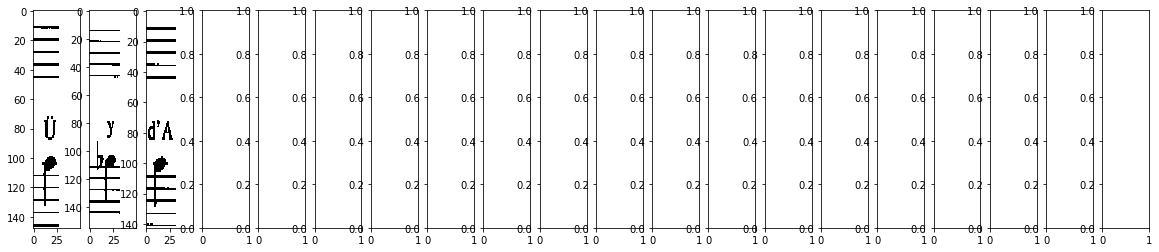

Cluster:  52


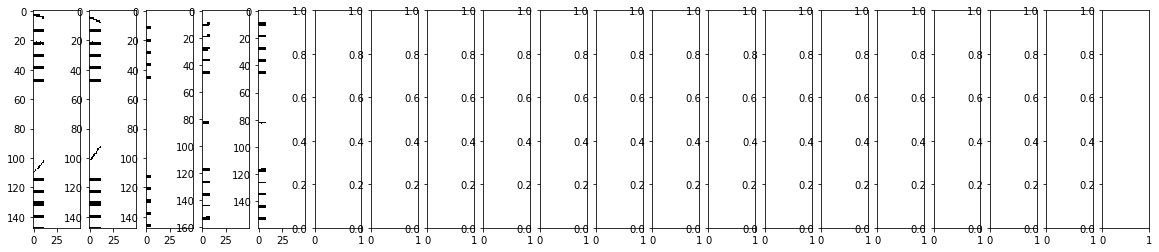

Cluster:  53


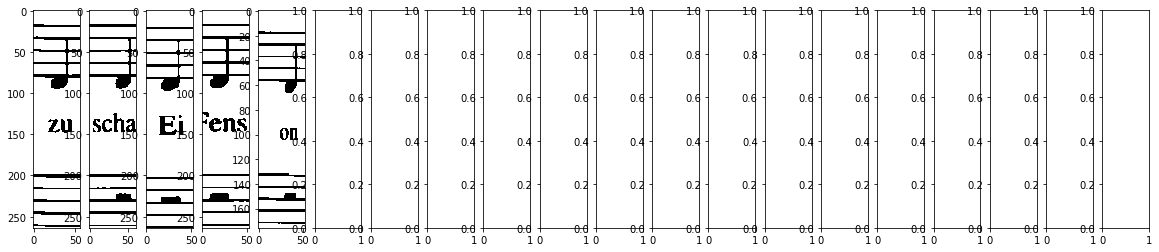

Cluster:  54


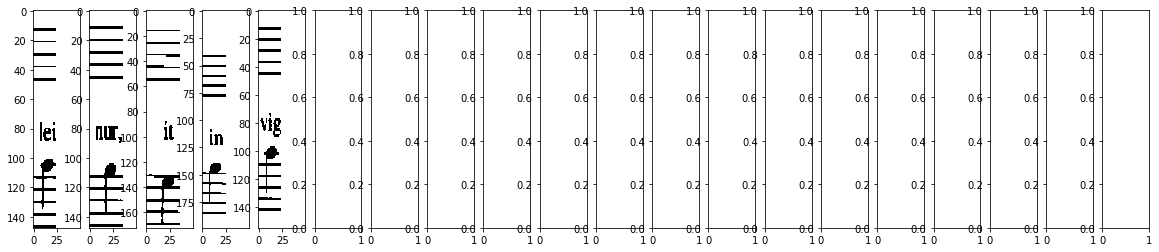

Cluster:  55


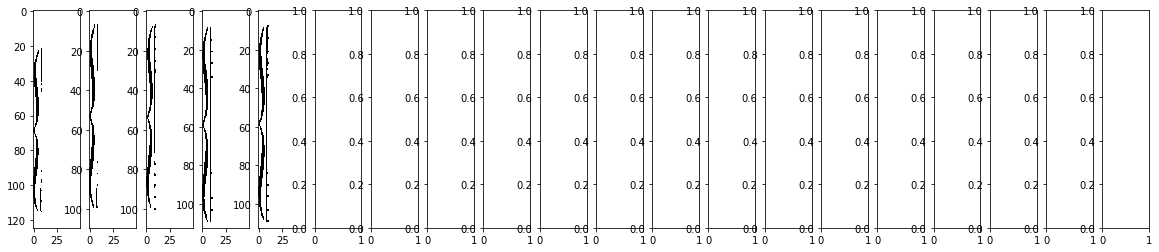

Cluster:  56


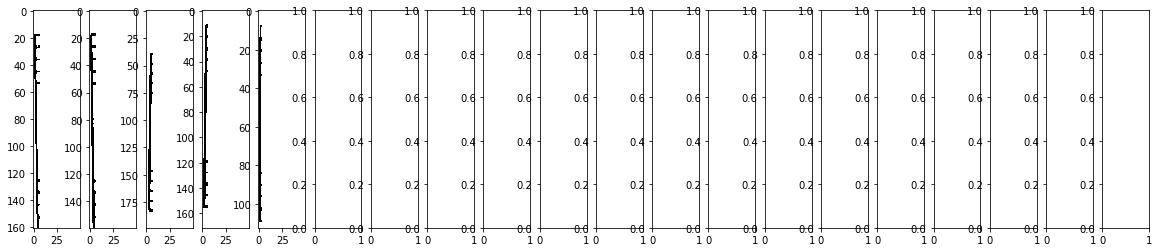

Cluster:  57


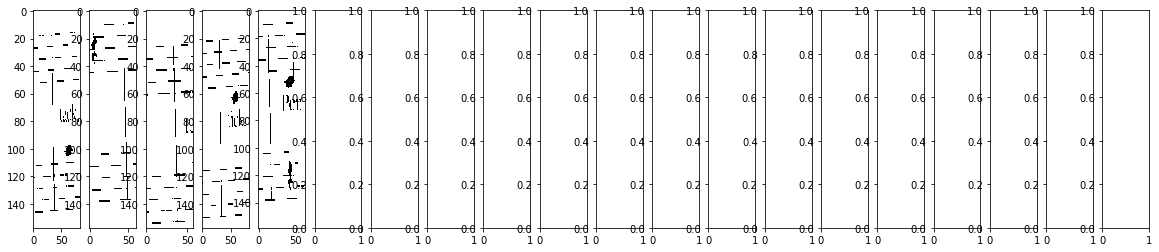

Cluster:  58


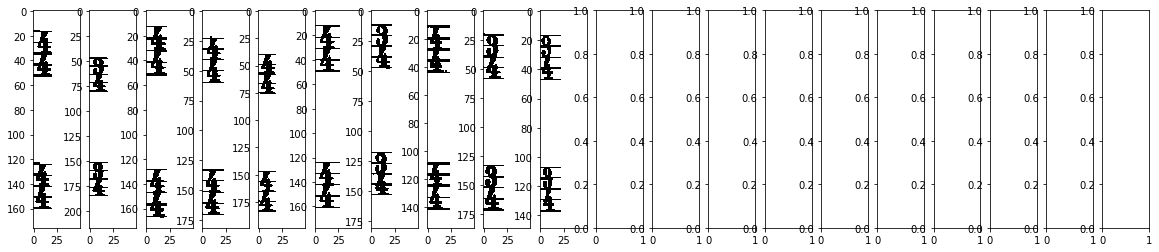

Cluster:  59


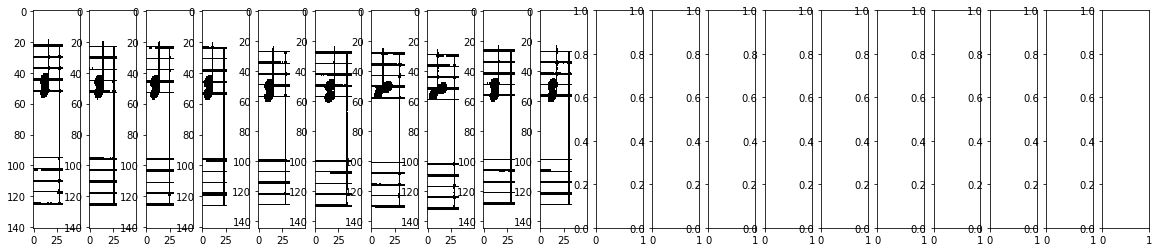

Cluster:  60


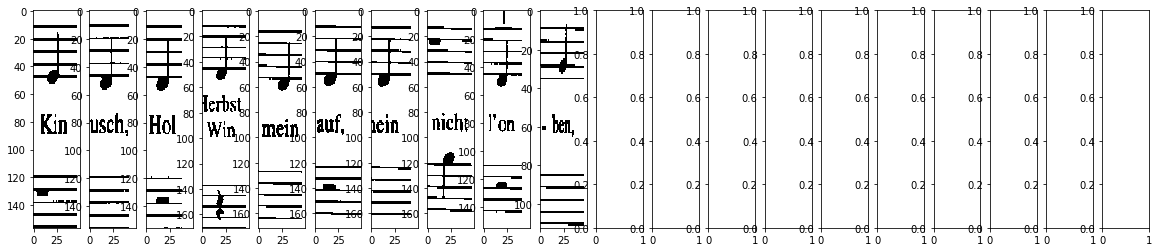

Cluster:  61


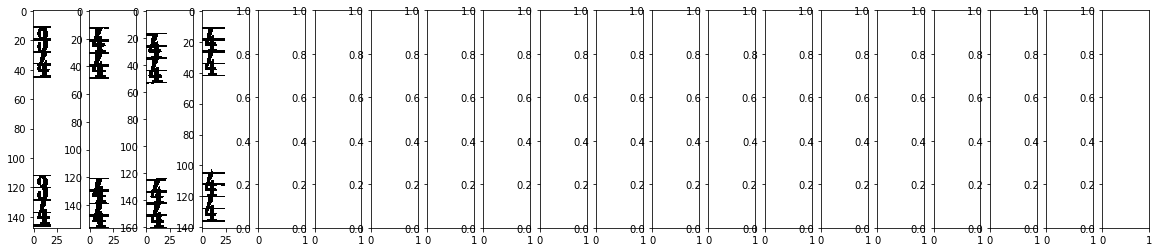

Cluster:  62


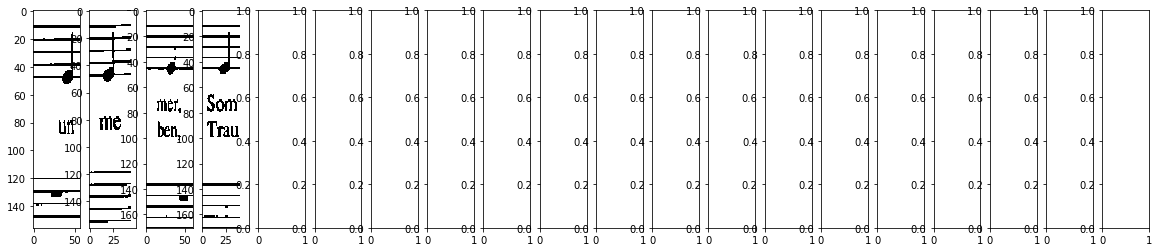

Cluster:  63


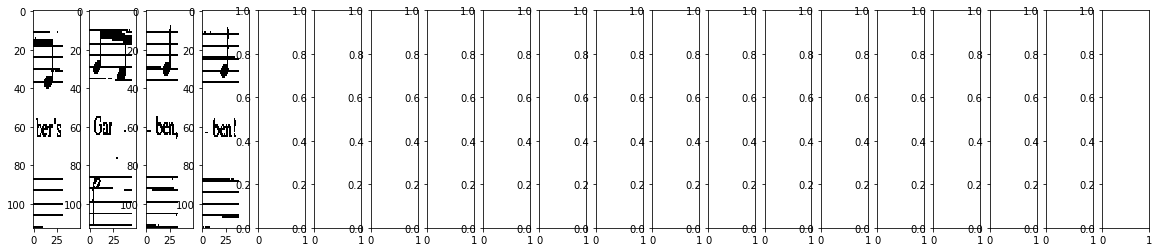

Cluster:  64


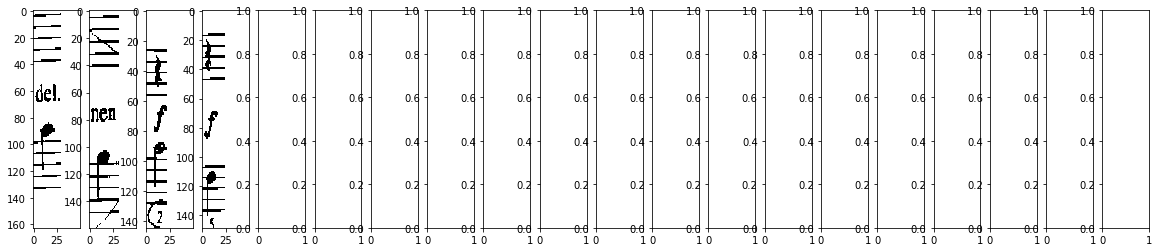

Cluster:  65


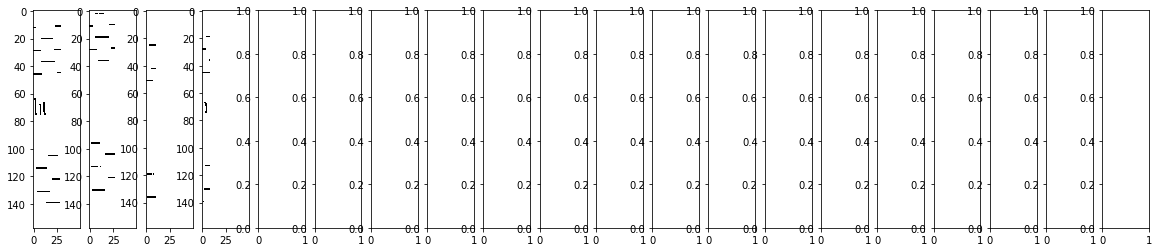

Cluster:  66


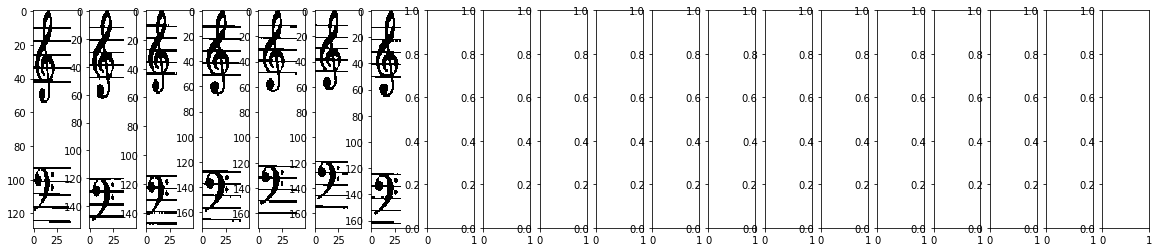

Cluster:  67


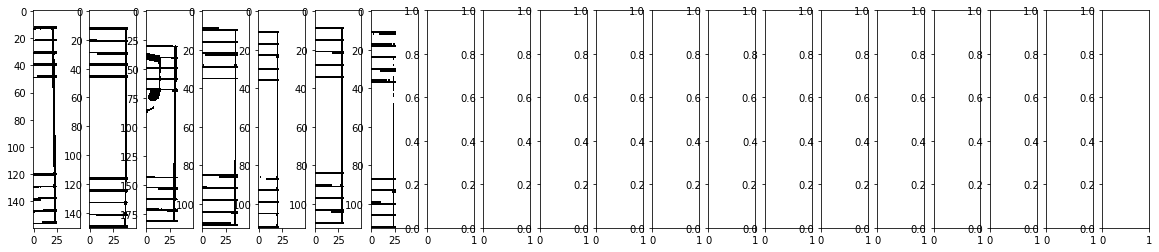

Cluster:  68


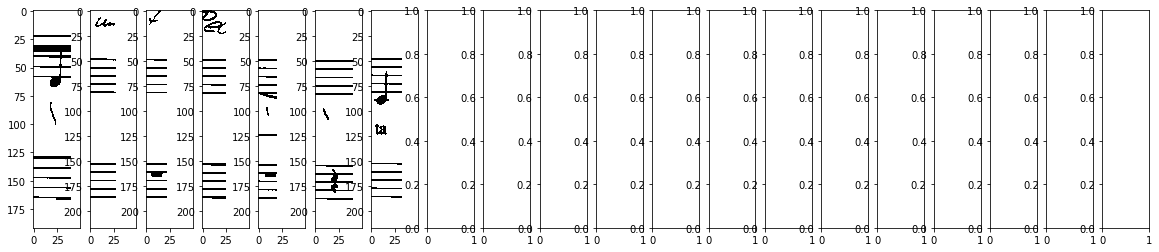

Cluster:  69


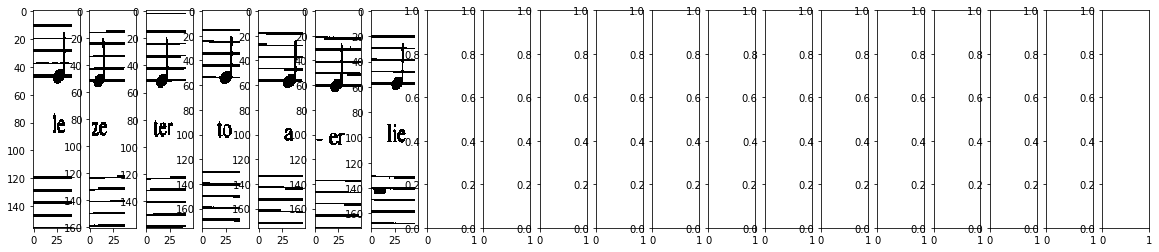

Cluster:  70


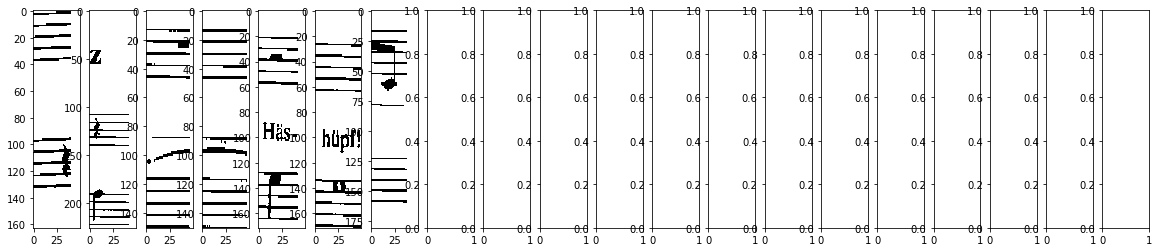

Cluster:  71


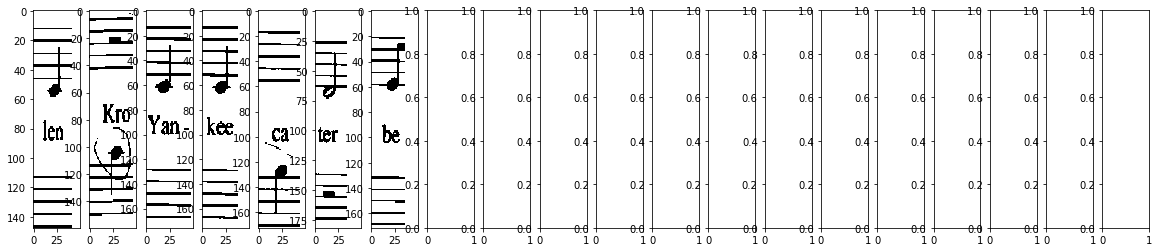

Cluster:  72


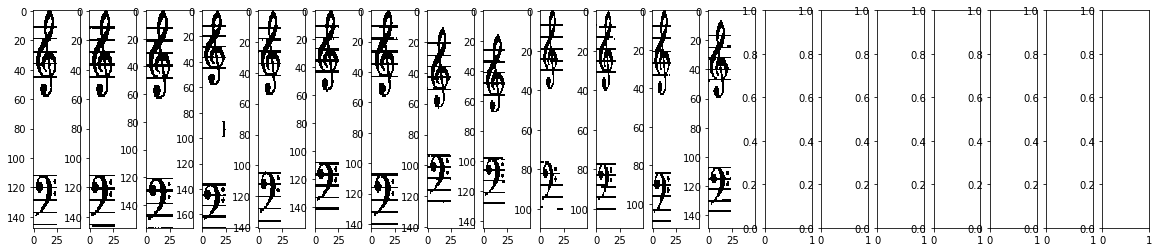

Cluster:  73


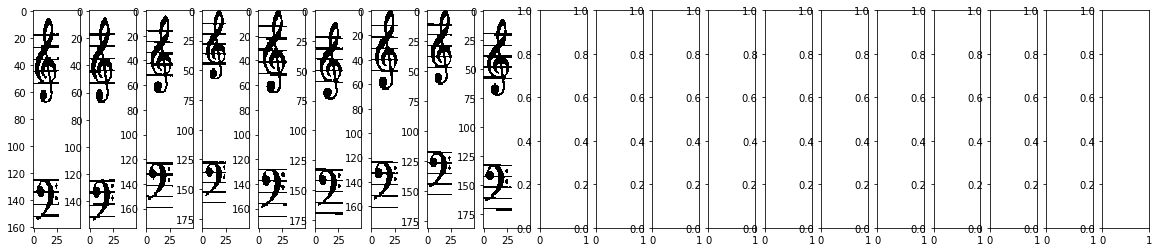

Cluster:  74


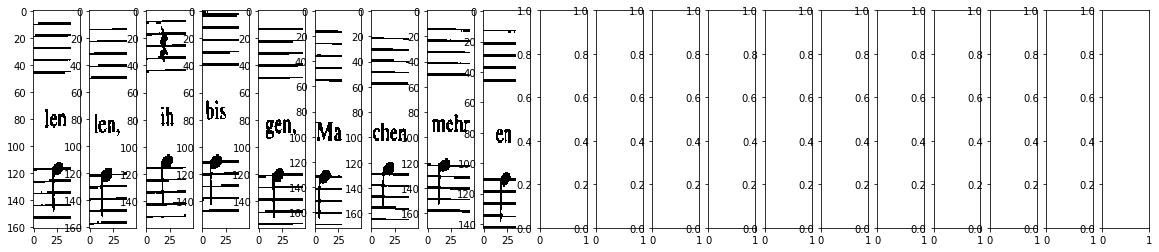

Cluster:  75


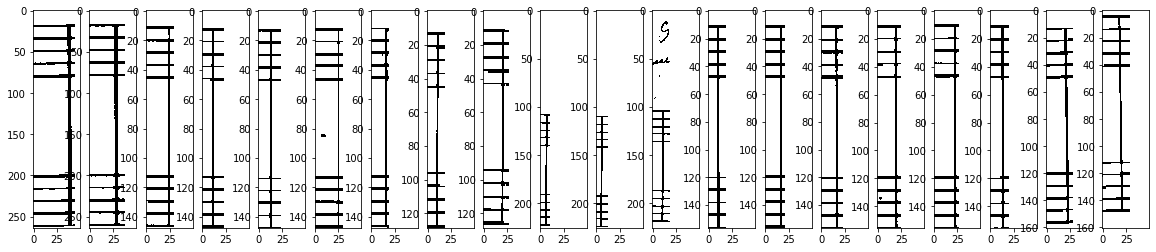

Cluster:  76


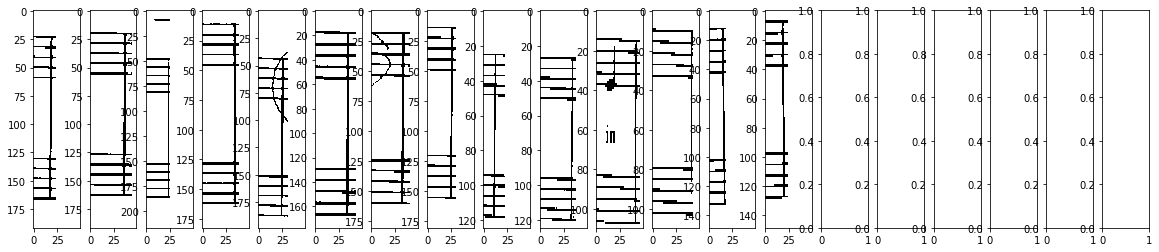

Cluster:  77


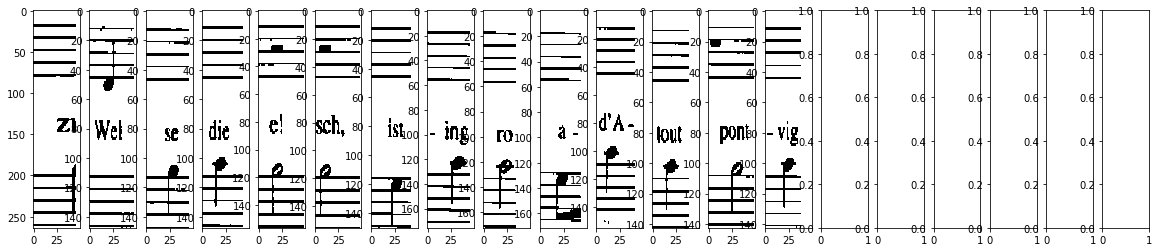

Cluster:  78


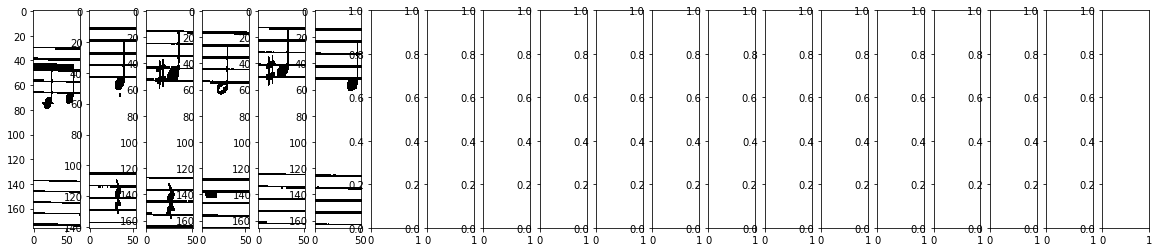

Cluster:  79


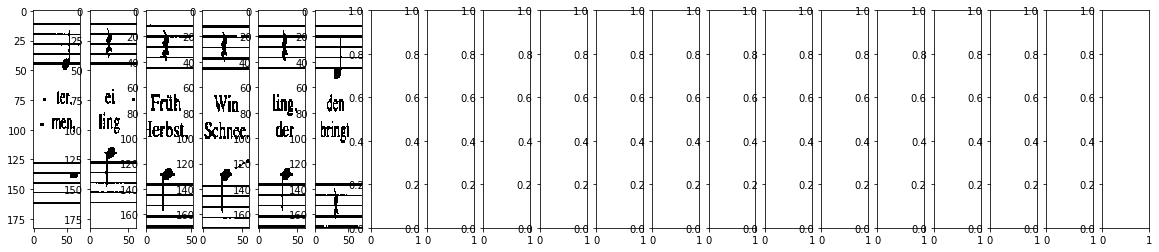

Cluster:  80


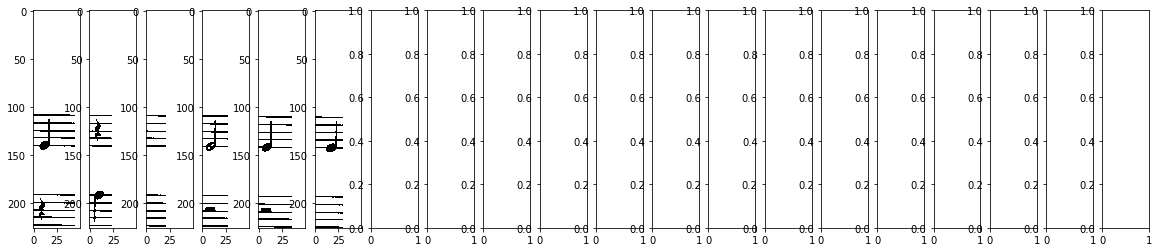

Cluster:  81


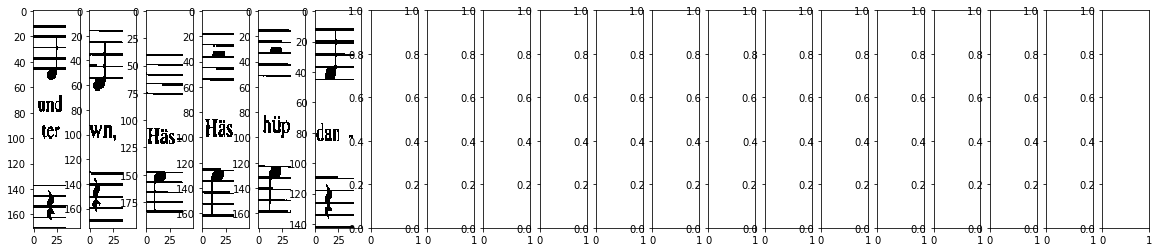

Cluster:  82


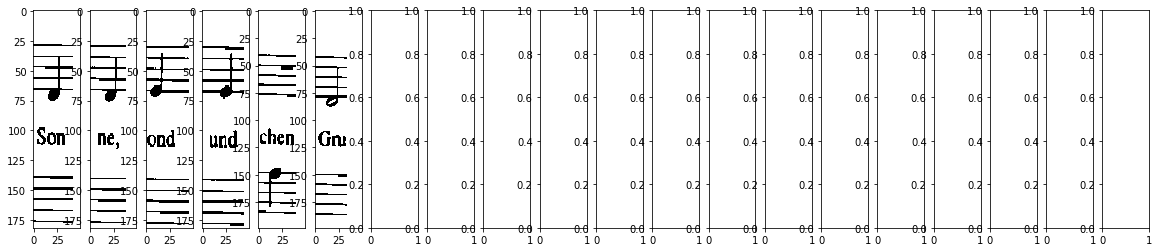

Cluster:  83


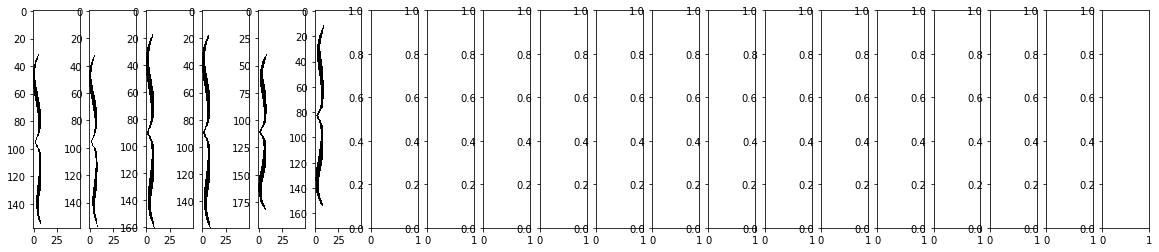

Cluster:  84


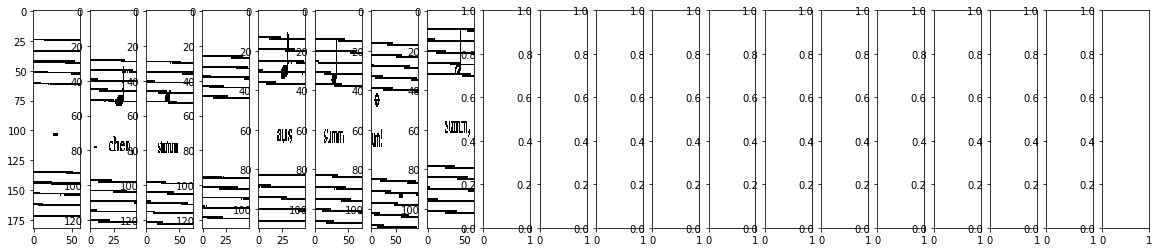

Cluster:  85


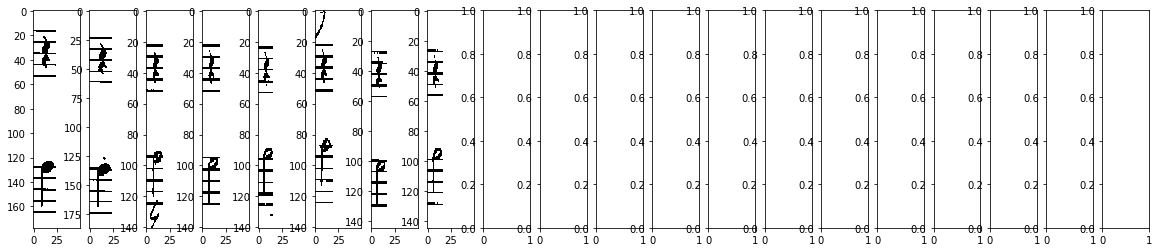

Cluster:  86


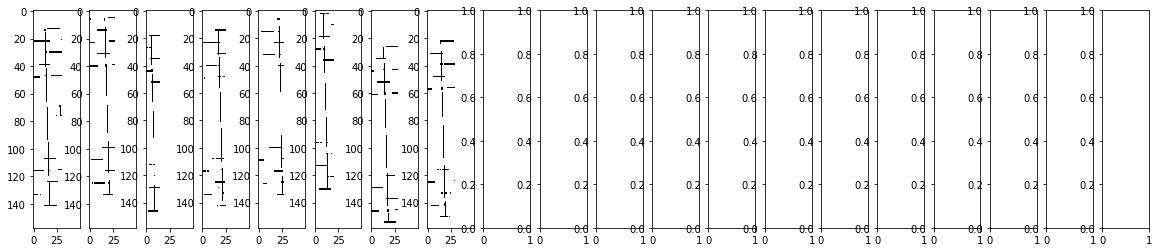

Cluster:  87


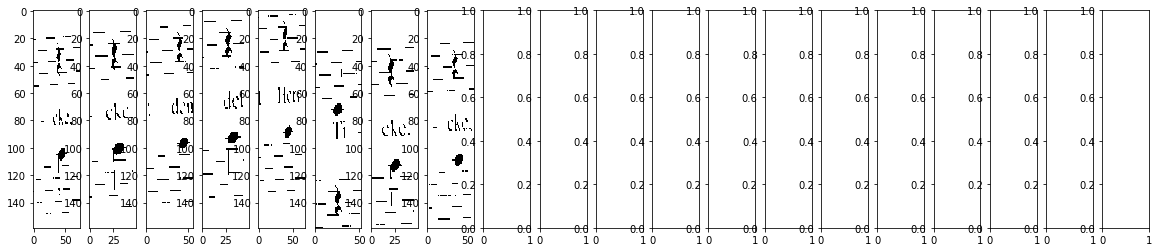

Cluster:  88


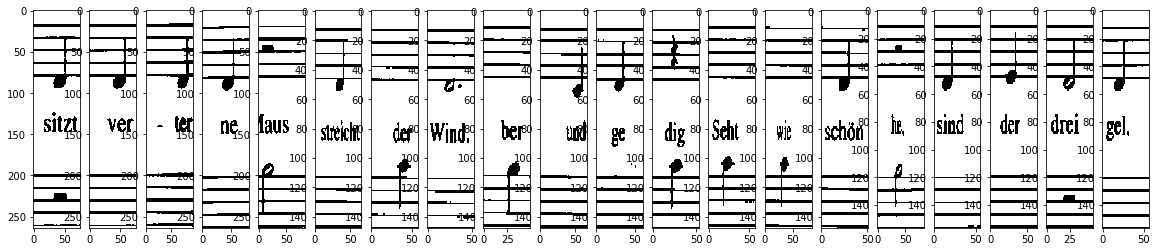

Cluster:  89


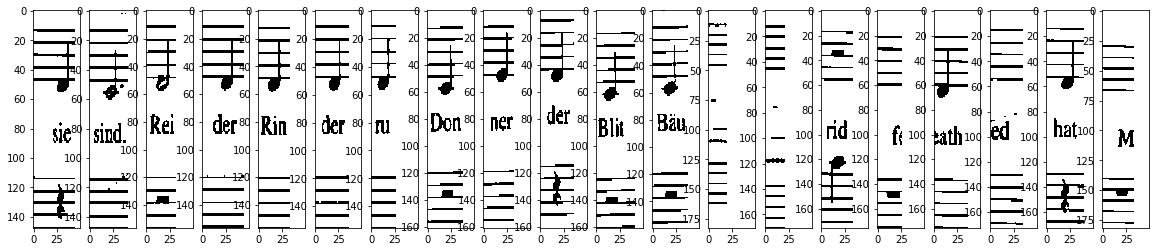

Cluster:  90


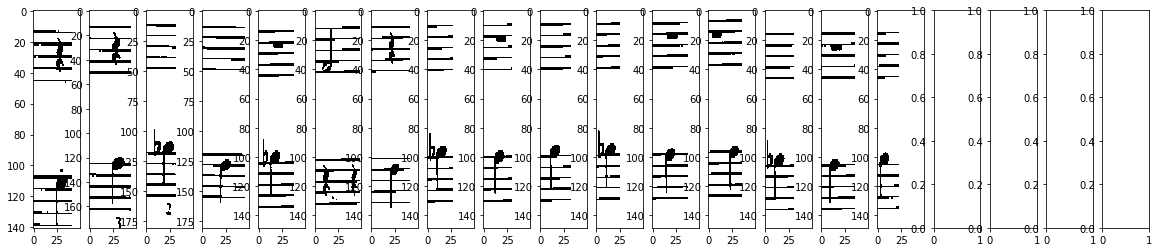

Cluster:  91


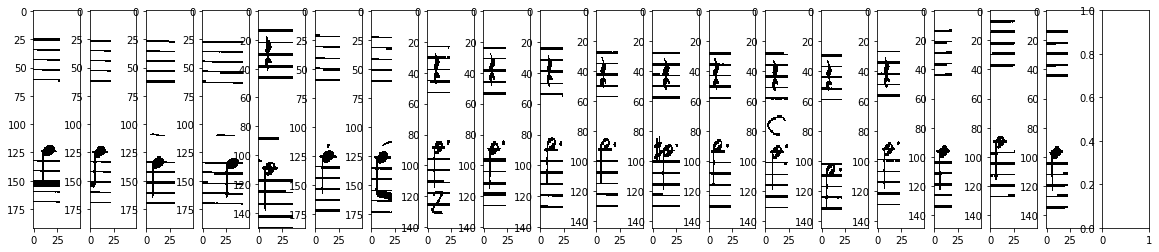

Cluster:  92


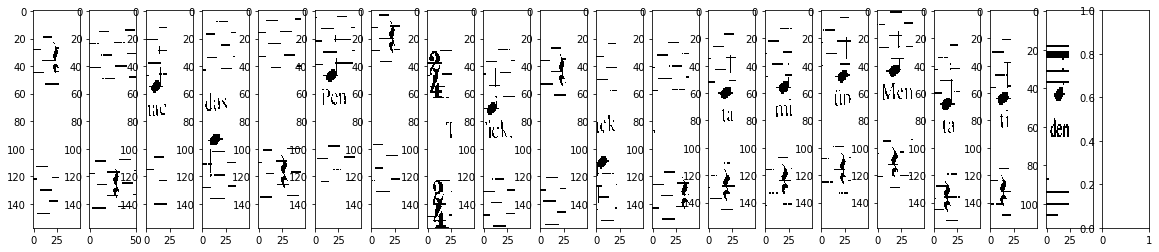

Cluster:  93


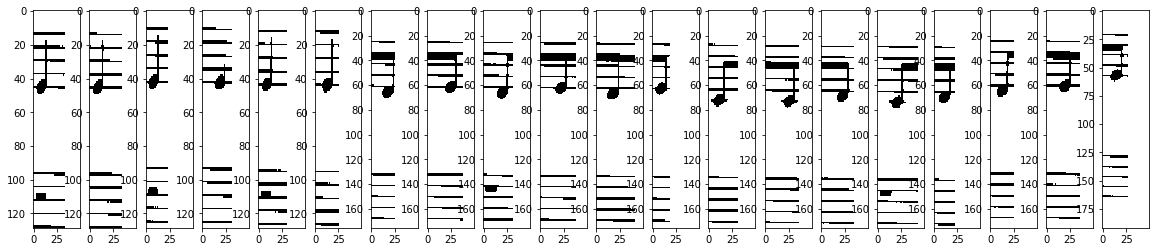

Cluster:  94


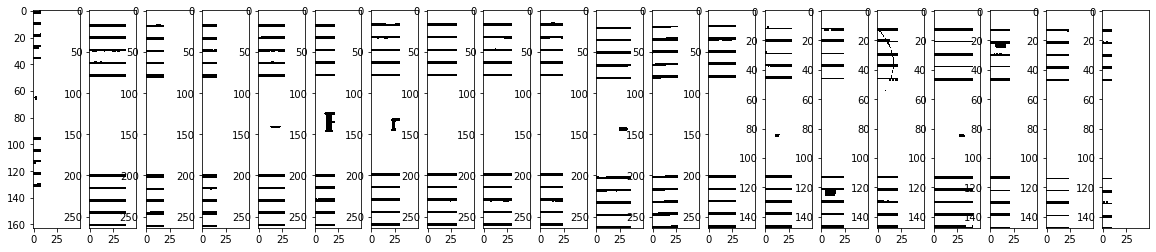

Cluster:  95


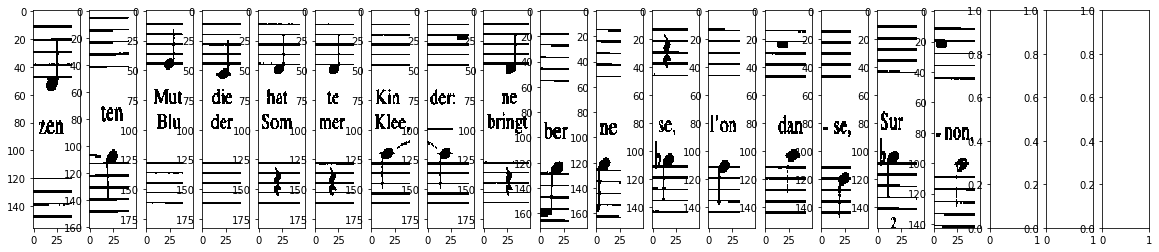

Cluster:  96


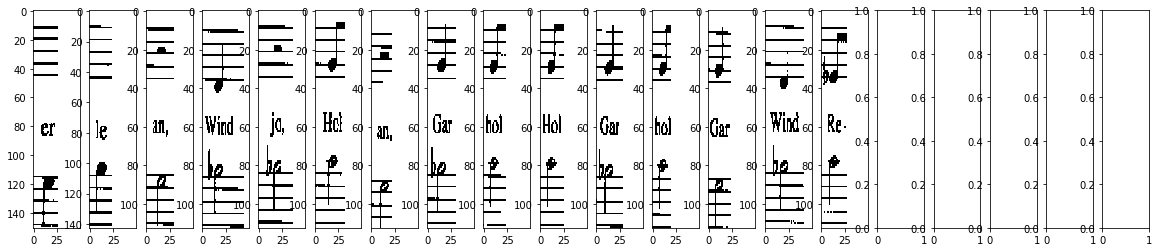

Cluster:  97


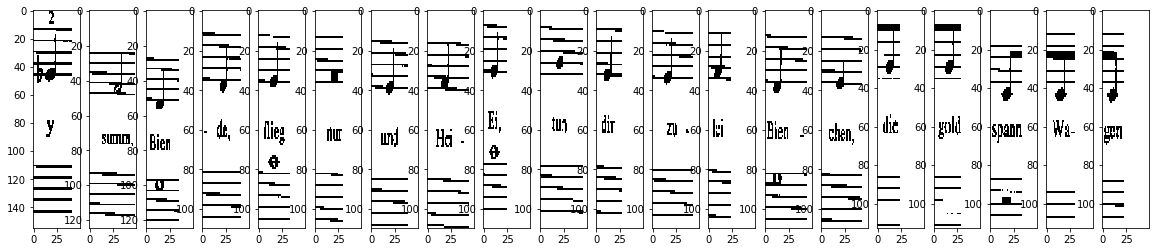

Cluster:  98


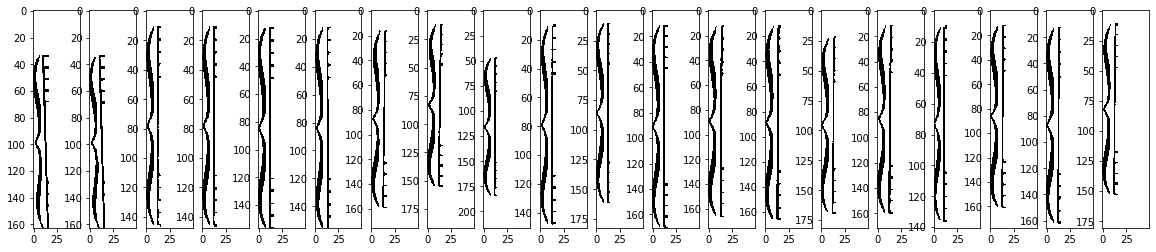

Done!


In [4]:
# print cluster

num_entries = 20

c = 0
for lists in clusters.values():
    for items in lists:
        print ("Cluster: ", c)

        fig, axs = plt.subplots(1, num_entries, figsize=(num_entries,4))
    
        cnt = 0
        for item in items:
            if cnt < num_entries:
                img = Image.open (item)
                axs[cnt].imshow(img, aspect='auto', cmap="gray")
                cnt = cnt + 1
        plt.show()    
        c = c + 1

print ("Done!")

In [5]:
# copy images according to cluster

import shutil

cpath_notes = "C:\\Data\\Dev-Data\\music\\cluster\\"

c = 0
for lists in clusters.values():
    for items in lists:
        print ("Cluster: ", c)
    
        for item in items:
            filepath = item
            filepathsplit = item.split ("\\")
            filename = filepathsplit[-1]
            filepath_c = cpath_notes + "c"+str(c)+"_"+filename
            print (filepath_c)
            shutil.copy(filepath, filepath_c)
        c = c + 1

print ("Done!")

Cluster:  0
C:\Data\Dev-Data\music\cluster\c0_04_1_13.PNG
C:\Data\Dev-Data\music\cluster\c0_04_1_14.PNG
Cluster:  1
C:\Data\Dev-Data\music\cluster\c1_14_0_12.PNG
C:\Data\Dev-Data\music\cluster\c1_14_0_18.PNG
Cluster:  2
C:\Data\Dev-Data\music\cluster\c2_15_0_20.PNG
C:\Data\Dev-Data\music\cluster\c2_15_0_32.PNG
Cluster:  3
C:\Data\Dev-Data\music\cluster\c3_18_0_11.PNG
C:\Data\Dev-Data\music\cluster\c3_18_0_6.PNG
Cluster:  4
C:\Data\Dev-Data\music\cluster\c4_19_0_27.PNG
C:\Data\Dev-Data\music\cluster\c4_19_0_9.PNG
Cluster:  5
C:\Data\Dev-Data\music\cluster\c5_19_0_22.PNG
C:\Data\Dev-Data\music\cluster\c5_19_1_13.PNG
Cluster:  6
C:\Data\Dev-Data\music\cluster\c6_01_1_26.PNG
C:\Data\Dev-Data\music\cluster\c6_08_1_11.PNG
Cluster:  7
C:\Data\Dev-Data\music\cluster\c7_09_0_2.PNG
C:\Data\Dev-Data\music\cluster\c7_19_1_2.PNG
Cluster:  8
C:\Data\Dev-Data\music\cluster\c8_08_0_1.PNG
C:\Data\Dev-Data\music\cluster\c8_14_0_2.PNG
Cluster:  9
C:\Data\Dev-Data\music\cluster\c9_19_0_26.PNG
C:\Data\Dev-